# Introduction to Differential Equations
We are going to begin talking about differential equations. We will continue to do so next week, after the midterm. In this lecture, I am just going to introduce the idea of what a differential equation is because differential equations are not a prerequisite for this class.

A *differential equation* is exactly what it sounds like: an *equation* that involves *differentials* or *derivatives*. Here are some examples:
$$ \frac{dm}{dq} = 1,$$
$$ x'(t) = x,$$
$$ \frac{d^2y}{dx^2}  + \frac{dy}{dx} = 2x,$$
$$ y'(t) + \sin(y) = 1-3e^t.$$
When we have algebraic equations, e.g., $x + 3 = 0$ the *solution* of that equation is the $x$ value that solves the algebraic equation. Now that we have a *differential equation* the *solution* is a *function* that satisfies the differential equation. This is not a differential equations class, so we will not worry about methods for solving these equations exactly. But, it will be helpful to see a few solutions and understand why they are solutions. Let's think about the first example above, $m'(q) = 1$. You can think about this as a question "*What function m(q) has the property that it's first derivative is equal to 1?*" I'll let you think about that for a minute.

We know that $m(q) = q$ has the property that $m'(q) = 1$. But is that the only solution? How about $m(q) = q + 1$, or $m(q) = q - 5$? The answer is that *all of these are solutions*. This is just like the *constant of integration* you've seen before. In fact, any solution method necessarily requires taking an integral (to get rid of the derivative in $x'(t)$), so we will always get a constant of integration in our solution. So the *general solution* of the *differential equation* $m'(q) = 1$ is $m(q) = q + c$, where $c$ is any constant. 

Why do differential equations matter? Let's consider an important example: $x'(t) = \alpha x$. It says that the function $x(t)$ is *defined by* having the property that its derivative is *proportional to* its value at some time $t$, with proportionality constant $\alpha$. This example is important because it is the example of **growth** (e.g., human population, animal population, bacteria population, compound interest, etc.). The *general solution* of this equation is $x(t) = x_0 e^{\alpha t}$, where $x_0$ is any constant (you can and should check this: take the derivative of $x(t) = x_0 e^{\alpha t}$ and see what it is equal to!). If I wanted to model population growth and I say that it is proportional to the current population, in order to say something about the population at some later time (say, 5 years in the future), is to say what the population was *at some point*. For instance, we may know that the initial population (what we say is $t=0$) is $100$, in other words $x(0) = 100$. We can plug this into $x(t) = x_0 e^{\alpha t}$ to find $x(0) = x_0 = 100$. Therefore the **particular solution** is $x(t) = 100 e^{\alpha t}$. 

What we have just done is solved the **differential equation** $x'(t) = \alpha x$ with **initial condition** $x(0) = 100$. When you have a differential equation and an initial condition, you have what is called an **initial-value problem (IVP). In this class, we will be solving initial-value problems on the computer.** The general form of an IVP is
$$ x'(t) = f(t, x(t)), \qquad x(0) = x_0,$$
where $f(t, x)$ is some function (we will assume it's a nice function, like you can take derivatives of it). In practice, the variable $x$ always appears in the formula on the right hand side, but often the variable $t$ does not appear explicitly.  If there is no $t$ in the formula, then we will sometimes write $x'(t) = f(x)$ instead, but we will see later that python's builtin methods require us to write $f(t, x)$ even if we don't care about the $t$.  

It should be no surprise to you at this point that we won't be finding the *exact* solution. Instead we will be finding an *approximate* solution.

## Ordinary Differential Equations (ODEs)
You will hear the term ordinary differential equation or ODE (your first differential equations class will be called something about ODEs). These are the types of differential equations we will focus on in this class. The non-ordinary types of differential equations are those that are differential equations for functions of multiple variables. This means you have to use partial derivatives, etc. These equations are called partial differential equations (PDEs) and are significantly harder to work with than ODEs.

## Approximate Solutions
With this in mind, we will choose a list of $t$ values $t_0$, $t_1$, $t_2$, $\dotsc$, $t_k$, $\dotsc$, $t_N$.  To make life easy, we will always start at $t_0 = 0$ and choose our $t$ values to be evenly spaced.  That is, we will always make sure that $t_{k+1} - t_k = \Delta t$ is the same for all $k$.  This means that we have the formula $t_k = k\Delta t$.  We will also usually name the final time $t_N = T$.  

In an ideal world, we would find the value of $x$ at each of these times.  That is, we would find $x(t_0)$, $x(t_1)$, $x(t_2)$, $\dotsc$, $x(t_k)$, $\dotsc$, $x(t_N)$.  However, we can't actually find the formula for $x(t)$, so we generally can't find these values exactly.  Instead, we will try to find approximations to each of these $x$ values.  We will call the approximations $x_0$, $x_1$, $x_2$, $\dotsc$, $x_k$, $\dotsc$, $x_N$.  We want $x_k \approx x(t_k)$.  Notice that $x_0 = x(t_0)$ is not actually an approximation; it is the initial condition that we are already given, and so it is exact.  Every other $x_k$, however, will only be approximately correct.  

Consider the example below. I'm not including the code now because I don't want to get tied up in the details, I just want you to see the idea behind what our approximation will look like.

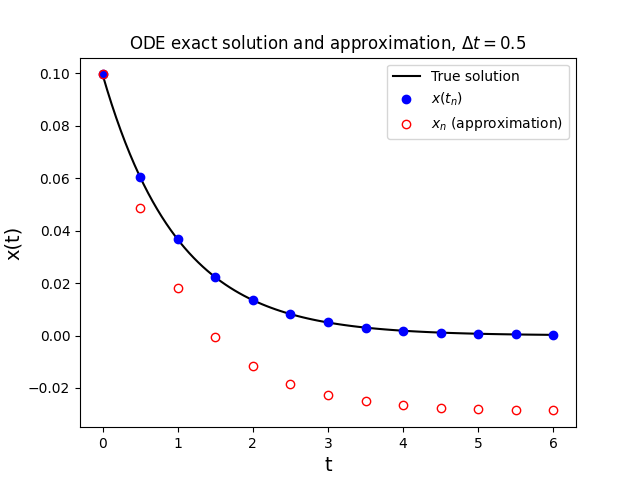



For the moment, let's ignore the details of how we might find these approximate $x$ values and just suppose that (for any given $\Delta t$ and $T$) we can produce a list of $x_k$'s.  We would like to know how good our approximation is and how the quality of our approximation depends on $\Delta t$ (and perhaps how it depends on $T$ or $f$ or $x_0$ as well).  There are quite a few different ways we could phrase this question, but we will focus on three popular versions: 

1) How much error do you accrue between two consecutive times?  That is, if $x_k$ is off by some amount from $x(t_k)$, then how much more (or possibly less) off will $x_{k+1}$ be from $x(t_{k+1})$?  It turns out that, for a fairly wide array of initial value problems, this doesn't really depend on $k$, and so we can just phrase it in terms of the first approximation: How big is the error at $t_1$?  That is, how big is $x_1 - x(t_1)$?  It should be obvious from the definitions that this depends on $\Delta t$ but not on $T$.  We will call this error the *local accuracy*.  

2) How much error do you accrue by the final time $T$?  That is, how big is $x_N - x(t_N)$?  It turns out that this depends on both $\Delta t$ and $T$ in complicated ways, but for all of the methods that we will look at, you can write this error as $\mathcal{O}(\Delta t^p)$, where $p$ is some power.  This means that if you hold $T$ constant, then the error is proportional to some power of $\Delta t$, and the power does not depend on $T$.  We call this error the *global accuracy*.  

3) How much error do you accrue if you let the process run forever?  That is, what happens to the global accuracy when you let $T\to\infty$?  This turns out to be a much more delicate question.  The general concept is known as *stability*, but mathematicians have studied many different versions of stability.  We will look at one of the simplest versions later.

## Forward Euler Method
Now let's derive a method for finding the approximations $x_k$.  We have the equation $x'(t) = f(t, x)$.  In general, we will already know the formula for $f$, but even if we knew $x(t_k)$ exactly for all of our times, this equation wouldn't help us because we still wouldn't know $x'(t)$.  To get around this problem, we can try to approximate $x'(t)$ using some of our $x$ values.  For example, let's use the first-order forward difference scheme that we derived a few weeks ago to approximate $x'(t)$.  That is, we will write 

$x'(t) \approx \frac{x(t + \Delta t) - x(t)}{\Delta t}$.

This approximation is valid for any time, so in particular it is valid at time $t = t_0$.  We therefore have 

$x'(t_0) \approx \frac{x(t_0 + \Delta t) - x(t_0)}{\Delta t} = \frac{x(t_1) - x_0}{\Delta t},$

(since $t_0 + \Delta t = t_1$). We can therefore (approximately) rewrite our differential equation as 

$\frac{x(t_1) - x_0}{\Delta t} \approx f(t_0, x(t_0)) = f(t_0, x_0)$.  

If we rearrange this, we get 

$x(t_1) \approx x_0 + \Delta t f(t_0, x_0)$.  

Of course, this isn't the actual $x(t_1)$, but if $\Delta t$ is small enough then it should be a good approximation, so we will take this formula as our definition for $x_1$.  That is, 

$x_1 = x_0 + \Delta t f(t_0, x_0)$.  

Notice that we know everything on the right hand side of this equation.  We are given $x_0$, $t_0$, $f$ and $\Delta t$ at the start of the problem, so this formula gives us $x_1$.  We say that this is an *explicit* formula because it is already solved for $x_1$ in terms of things we already know.  

We can do exactly the same thing at time $t = t_1$.  Our difference scheme is then 

$x'(t_1) \approx \frac{x(t_1 + \Delta t) - x(t_1)}{\Delta t} = \frac{x(t_2) - x(t_1)}{\Delta t}$.  

Plugging this into our differential equation at time $t_1$ and rearranging, we get 

$x(t_2) \approx x(t_1) + \Delta t f(t_1, x(t_1))$.  

We don't know $x(t_1)$ or $x(t_2)$, but we do already have an approximation to $x(t_1)$, so we have 

$x(t_2) \approx x_1 + \Delta t f(t_1, x_1)$.  

As before, we will just take this as the definition for $x_2$, so we have 

$x_2 = x_1 + \Delta t f(t_1, x_1)$.  

Once again, this is an explicit equation for $x_2$.  We just found $x_1$ in the last step, and everything else in this formula was given at the beginning of the problem.  

We can keep repeating this process for as long as we want.  In general, if we have already found all the $x$ values up to $x_k$, then we get the formula 

$x_{k+1} = x_k + \Delta t f(t_k, x_k)$.  

This method of approximation is called the *forward Euler method*, because we used a forward difference scheme to approximate $x'(t)$.  We say that the forward Euler method is a *time stepping method* because we find the approximation to $x$ at each time in turn.  That is, we find an approximation for $x(t_1)$, then an approximation for $x(t_2)$, then an approximation for $x(t_3)$, etc., and we never go back and find a new approximation for an earlier time.  The forward Euler method is also called *explicit* because at each step we have to solve an explicit equation for the next approximation.  

## Graphical representation of differential equations
It's going to be very helpful to visualize the numerical approximation methods we will use in this class (such as Forward Euler above). To do so, we need to think about visualizing differential equations. When we have 
$$ x'(t) = f(t, x)$$
this means that the derivative of the function $x(t)$ is defined at every point in the $(t,x)$ plane by the function $f(t,x)$. In other words, if we plug in some value of $x$ and $t$, we get a derivative, or a slope. In order to plot it, we plug in a bunch of $x$ and $t$ values, and we get the slope for all of the $t$ and $x$ values. 

Let's think back to the example that I said was really important: $x'(t) = \alpha x$. To be specific, let's choose $\alpha = 2$ so we have $x'(t) = 2 x$. Then let's just choose a random point in the $(t,x)$ plane, e.g., $t = 1,~x=3$. We have that $x'(1) = 2\times 3 = 6$. We can visualize this using a *quiver plot.*

Text(0, 0.5, 'x')

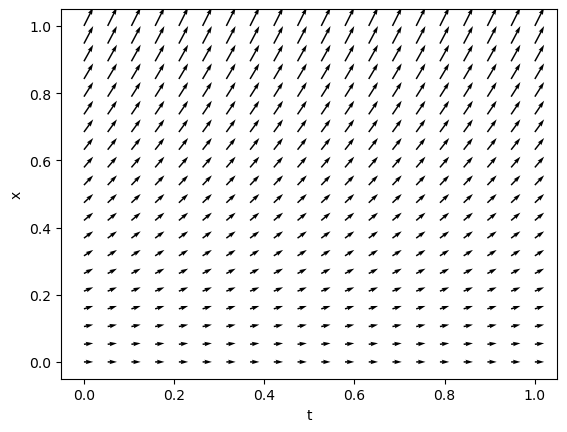

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Create a numpy array of 20 linearly spaced t points between 0 and 1 
#       and 20 linearly spaced x points between 0 and 1
t = np.linspace(0, 1, 20) # Solve up to t=1
x = np.linspace(0, 1, 20) # Plot for x between 0 and 1

# To do this, we need a meshgrid... You create it below!
T, X = np.meshgrid(t, x)

# Now that we have the meshgrid, we want to draw arrows in the (t,x) plane. 
# To do so we use plt.quiver. The syntax is plt.quiver(location_1, location_2, run, rise).
# In this case, location_1 = t, location_2 = x, then because the slope is 2x, the run is 1 and rise is 2x.
fig, ax = plt.subplots()
ax.quiver(T, X, np.ones(T.shape), 2*X)
ax.set_xlabel('t')
ax.set_ylabel('x')

So what does a solution look like? In order to visualize it we need to have an initial condition! Let's add an initial condition to the plot. Let's choose $x(0) = 0.2$. 

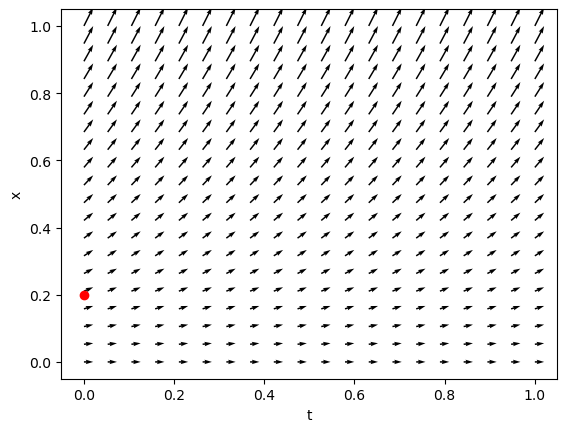

In [11]:
ax.plot(0, 0.2, 'ro')
fig

Then the solution is $x(t) = 0.2 e^{2t}$. We can also plot that below.

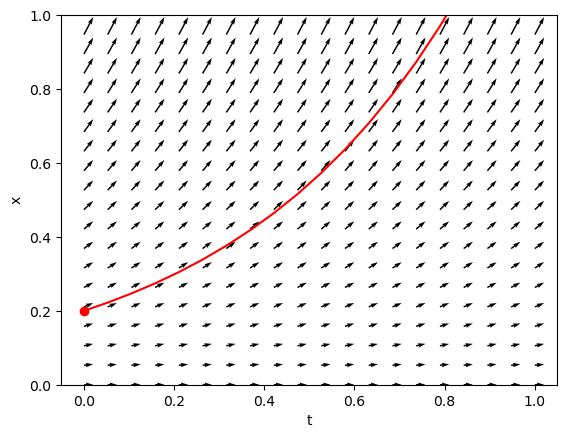

In [12]:
# You add a plot of the solution to the figure. Plot the solution in red.
ax.plot(t, 0.2*np.exp(2*t), 'r')
ax.set_ylim([0, 1])
fig

We can see that the solution is following the arrows, because the arrows tell us the slope of the tangent line at each point. If we had a different initial condition, like $x(0) = 0.1$, we would have a different solution curve.

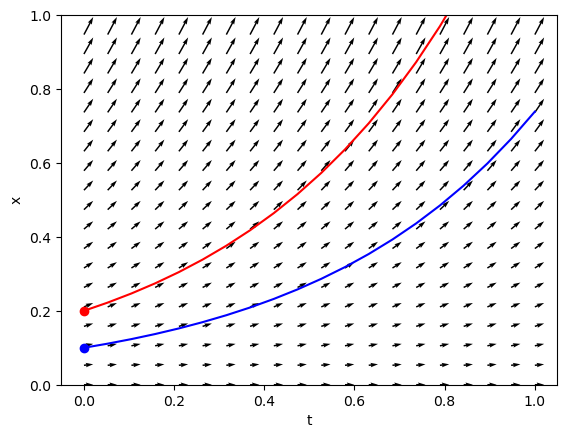

In [13]:
# Plot a dot at (t,x) = (0, 0.1) and the solution curve, both in blue
ax.plot(0, 0.1, 'bo')
ax.plot(t, 0.1*np.exp(2*t), 'b')
fig

If we choose $\Delta t = 0.5$, then one step of Forward Euler is to follow the slope of the tangent line at the initial condition, $t=0$, for a certain time ($\Delta t$). Let's visualize that below.

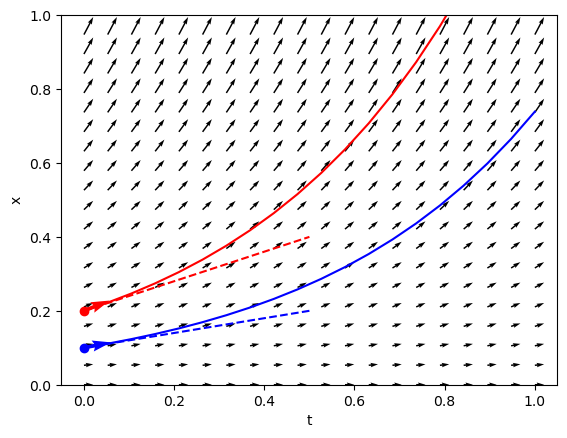

In [14]:
# Draw one quiver (arrow) starting at (t, x) = (0, 0.2) with slope given by f(0, 0.2). 
# Draw this quiver in red.
delta_t = 0.5
x_0 = 0.2
ax.quiver(0, x_0, 0.5, 2*delta_t*x_0, color = 'r') 
# Then draw the tangent line at this point
ax.plot([0, delta_t], [x_0, x_0 + 2*delta_t*x_0], 'r--') # Goes from point (t_0, x_0) = (0, 0.2) 
                                                 # to (t_1, x_1) = (0.3, 0.2 + 2*0.5*0.3), 
                                                 # from the Forward Euler formula

# Do the same thing for the blue curve.
x_0_b = 0.1
ax.quiver(0, x_0_b, delta_t, 2*x_0_b*delta_t, color = 'b')
ax.plot([0, delta_t], [x_0_b, x_0_b + 2*delta_t*x_0_b], 'b--') 

fig

Following this tangent line gives the next point, which we plot below.

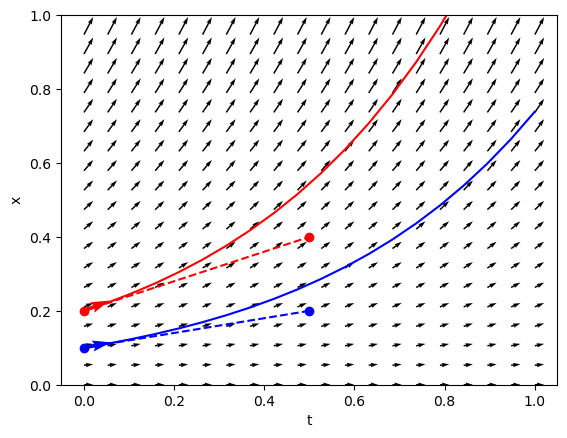

In [15]:
# First plot the x_1 point for the red curve
x_1 = x_0 + 2*delta_t*x_0
ax.plot(delta_t, x_1, 'ro')

# Then do the same for the red curve
x_1_b = x_0_b + 2*delta_t*x_0_b
ax.plot(delta_t, x_1_b, 'bo')
fig

The two dots we see at $t=0.5$ are the *approximate* values of $x(0.5)$ for the *two different initial conditions*. To get the next approximation, for $x(1)$, we apply the formula again. That is,
$$x(1) = x(0.5) + 0.5\times 2 \times x(0.5).$$
You can implement that below.

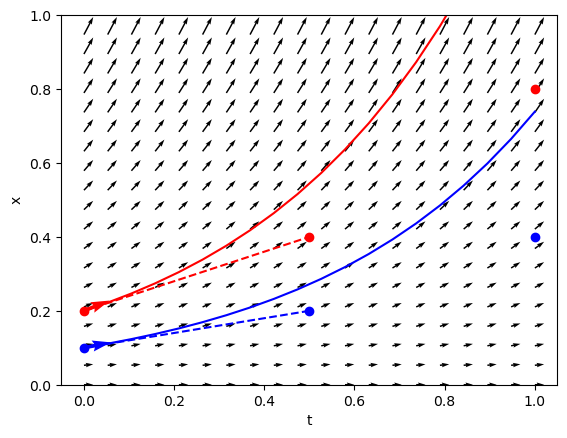

In [16]:
# First plot the x_2 point for the red curve
x_2 = x_1 + 2*delta_t*x_1
ax.plot(2*delta_t, x_2, 'ro')

# Then do the same for the blue curve
x_2_b = x_1_b + 2*delta_t*x_1_b
ax.plot(2*delta_t, x_2_b, 'bo')
fig

I think you can see where this is going, if we want to find the solution at all points in a given domain, you can use a loop! 

Below we'll find the solution of $$x'(t) = 2t, x(0) = 3$$ at all points from $0\leq t \leq 1$ with $\Delta t = 0.1$. 

In [17]:
# Define dt
dt = 0.1

# Define the t values at which we will get the solution, using delta t = 0.1
# call the values 'tspan'
tspan = np.arange(0, 1, 0.1)

# Define the ODE as an anonymous function.
# Call the anonymous function "ode"
ode = lambda t: 2*t

# We will use initial condition x_0 = 3. Define it below
x_0 = 3

# Now define an empty version of our solution, which we will call 'x'
x = np.zeros(len(tspan))

# Before we do the for loop, define the initial value of x, which is the x_0 value
x[0] = x_0

# Now do the for loop at each value of tspan
for k in range(len(tspan)-1): # Note that we do len(tspan)-1 because we use x[k+1]
    x[k+1] = x[k] + dt*(ode(x[k]))

print(x)

[ 3.          3.6         4.32        5.184       6.2208      7.46496
  8.957952   10.7495424  12.89945088 15.47934106]


Now we plot it

Text(0.5, 1.0, "Solution of x'(t)=2t, x(0) = 3, using Forward Euler")

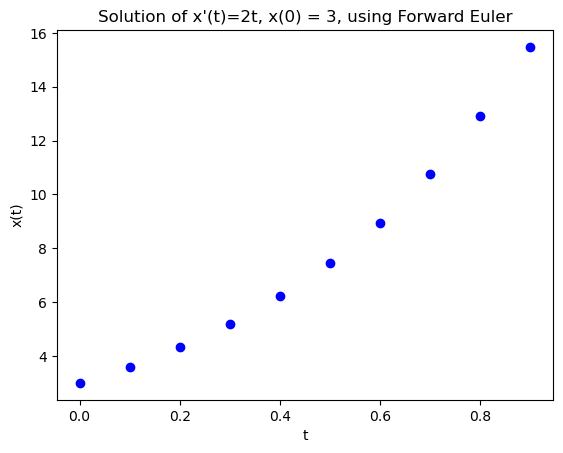

In [18]:
plt.figure() # Create a new figure
plt.plot(tspan, x, 'bo')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Solution of x'(t)=2t, x(0) = 3, using Forward Euler")